# Graph Analysis
### Degree centrality
**Degree centrality** measures a node's *importance* by counting its direct connections. 
- In an **unweighted** graph: It is simply the number of neighbors (called **degree**)
- In a **weighted** graph: It is the sum of edge weights (also called **strength**). 

**Hint:** Higher degree centrality indicates a more connected or influential node, often serving as a hub in the network.
<hr>

**Normalization** in degree centrality scales the raw degree to a comparable range (usually [0, 1]):
- **Unweighted** graphs: Divide by $n−1$  ( which is the maximum possible degree), where $n$ is the number of nodes.  
- **Weighted** graphs: Commonly divide by the maximum observed **strength** in the graph; alternatively, use **total strength** or a **theoretical maximum** $(n−1) \cdot wmax$, if edge weights are bounded by $wmax$.
     
<hr>

In the following, we first implement a function to compute degree centrality from adjacency list of a graph. Then, we test it by a simple social network. We also test it by the Zachary's karate club network. We display both graphs by **NetworkX**. Moreover, we implmeent a function to compute degree centrality for weighted graphs, which includes three types of normalization. Finally, we test this function by a simple weighted graph.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Define degree centrality for unweighted graphs
def degree_centrality_unweighted(adj_list, normalized=False):
    """
    Parameters:
    - adj_list: dict where adj_list[node] = list of neighbors
    - normalized: if True, normalize by (n-1)
    Returns:
    - dict: node -> degree centrality
    """
    nodes = list(adj_list.keys())
    n = len(nodes)
    
    degrees = {}
    for node, neighbors in adj_list.items():
        # Degree = number of neighbors
        degree = len(neighbors)
        
        if normalized:
            degree = degree / (n - 1) if n > 1 else 0
        
        degrees[node] = degree
    
    return degrees

In [3]:
# Unweighted social network example
social_network = {
    'Alice': ['Bob', 'Charlie', 'Diana', 'Eve'],
    'Bob': ['Alice', 'Charlie', 'Frank'],
    'Charlie': ['Alice', 'Bob', 'Diana'],
    'Diana': ['Alice', 'Charlie', 'Eve'],
    'Eve': ['Alice', 'Diana', 'Frank'],
    'Frank': ['Bob', 'Eve', 'Grace'],
    'Grace': ['Frank', 'Henry'],
    'Henry': ['Grace']
}
# Calculate degrees
raw_degrees = degree_centrality_unweighted(social_network, normalized=False)
norm_degrees = degree_centrality_unweighted(social_network, normalized=True)
# Basic statistics
n = len(social_network)
total_edges = sum(raw_degrees.values()) // 2
avg_degree = sum(raw_degrees.values()) / n

print(f"Network: {n} nodes, {total_edges} edges")
print(f"Average degree: {avg_degree:.2f}")
print("\nNode degrees:")
print("Node | Raw Degree | Normalized")
print("-" * 30)
for node in sorted(raw_degrees.keys()):
    print(f"{node:4} | {raw_degrees[node]:10} | {norm_degrees[node]:.3f}")

# Degree distribution
degree_counts = {}
for degree in raw_degrees.values():
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

print(f"\nDegree distribution:")
for degree, count in sorted(degree_counts.items()):
    print(f"Degree {degree}: {count} nodes")
    
# Find most connected nodes
print(f"\nTop three important nodes:")
sorted_nodes = sorted(raw_degrees.items(), key=lambda x: x[1], reverse=True)
for i, (node, degree) in enumerate(sorted_nodes[:3], 1):
    print(f"{i}. {node}: degree {degree}")

Network: 8 nodes, 11 edges
Average degree: 2.75

Node degrees:
Node | Raw Degree | Normalized
------------------------------
Alice |          4 | 0.571
Bob  |          3 | 0.429
Charlie |          3 | 0.429
Diana |          3 | 0.429
Eve  |          3 | 0.429
Frank |          3 | 0.429
Grace |          2 | 0.286
Henry |          1 | 0.143

Degree distribution:
Degree 1: 1 nodes
Degree 2: 1 nodes
Degree 3: 5 nodes
Degree 4: 1 nodes

Top three important nodes:
1. Alice: degree 4
2. Bob: degree 3
3. Charlie: degree 3


<hr style="height:3px;background-color:lightblue">

## Extra, helper functions
#### Helper functions to load and/or display the graphs with NetworkX

In [4]:
# Helper functions to draw the graphs and communities 
def networkx_to_adjacency(nx_graph):
    """
    Convert NetworkX graph to adjacency list
    """
    adj_list = {}
    for node in nx_graph.nodes():
        adj_list[node] = list(nx_graph.neighbors(node))
    return adj_list

#--------------------

def adjacency_to_networkx(adj_list):
    """
    Convert adjacency list to NetworkX graph for visualization
    """
    G = nx.Graph()
    for node, neighbors in adj_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    return G

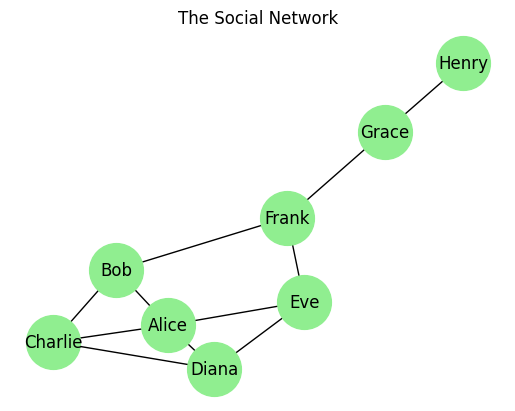

In [5]:
# THe graph of social_network 
G_social=adjacency_to_networkx(social_network)
plt.title('The Social Network')
nx.draw(G_social,with_labels=True,node_size=1500,node_color='lightgreen')

In [6]:
# Load the famous dataset Zachary's network
G_kc = nx.karate_club_graph()

# Convert to adjacency list
adj_list_kc = networkx_to_adjacency(G_kc)

# Get degrees
raw_degrees_kc=degree_centrality_unweighted(adj_list_kc)

# Print the top three important nodes
print(f'Top three important nodes based on degree centrality:')
for (node,degree) in sorted(raw_degrees_kc.items(),key=lambda x: x[1], reverse=True )[:3]:
    print(f"Node {node} has degree {degree}")

Top three important nodes based on degree centrality:
Node 33 has degree 17
Node 0 has degree 16
Node 32 has degree 12


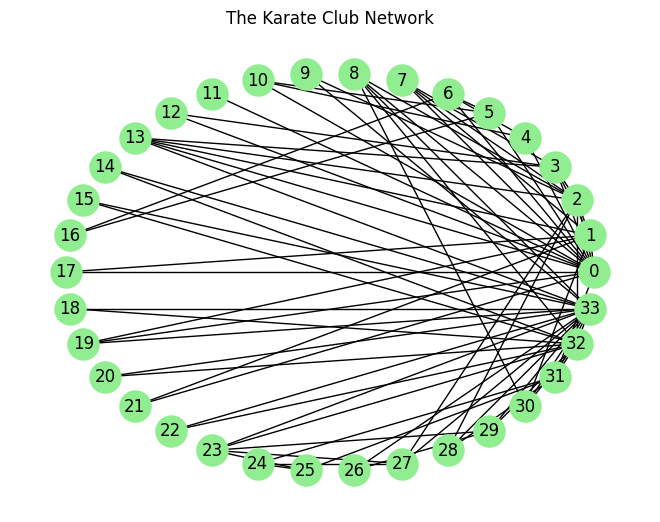

In [7]:
# THe graph of karate club 
pos=nx.circular_layout(G_kc,scale=3)
nx.draw(G_kc,pos,with_labels=True,node_size=500,node_color='lightgreen')
plt.title('The Karate Club Network')
plt.show()

<hr style="height:3px;background-color:lightblue">

# Bonus
#### Degree centrality and its well-known normalization forms for weighted undirected graphs

In [8]:
def degree_centrality_weighted(adj_list, normalize_by= "max", w_max= None):
    """
    Compute weighted degree centrality (node strength) with optional normalization.
    
    Parameters:
    -----------
    adj_list : dict
        Weighted undirected graph as adjacency list: {node: [(neighbor, weight), ...]}
    normalize_by : str, optional
        Normalization method:
        - "none"      : return raw strength (sum of edge weights)
        - "max"       : divide by max strength in the graph (default)
        - "total"     : divide by total strength (i.e., 2 * total edge weight)
        - "theoretical": divide by (n - 1) * w_max (requires w_max)
    w_max : float, optional
        Maximum possible edge weight. Required if normalize_by="theoretical".
        
    Returns:
    --------
    centrality : dict
        {node: normalized_weighted_degree}
    """
    if not adj_list:
        return {}
    
    nodes = list(adj_list.keys())
    n = len(nodes)
    
    # Compute weighted degree (strength) for each node
    strength = {}
    total_strength = 0.0
    for node in nodes:
        s = sum(float(w) for _, w in adj_list[node])
        strength[node] = s
        total_strength += s  # = 2 * total edge weight (since undirected)

    # Early return if no normalization
    if normalize_by == "none":
        return strength

    # Choose normalization
    if normalize_by == "max":
        max_s = max(strength.values())
        if max_s == 0:
            return {node: 0.0 for node in nodes}
        return {node: s / max_s for node, s in strength.items()}

    elif normalize_by == "total":
        if total_strength == 0:
            return {node: 0.0 for node in nodes}
        return {node: s / total_strength for node, s in strength.items()}

    elif normalize_by == "theoretical":
        if w_max is None:
            raise ValueError("w_max must be provided when normalize_by='theoretical'")
        if n <= 1:
            max_possible = 0.0
        else:
            max_possible = (n - 1) * w_max
        if max_possible == 0:
            return {node: 0.0 for node in nodes}
        return {node: s / max_possible for node, s in strength.items()}

    else:
        raise ValueError(
            "normalize_by must be one of: 'none', 'max', 'total', 'theoretical'"
        )

In [9]:
# Example with weighted graph
adj = {
    'A': [('B', 3.0), ('C', 2.0)],
    'B': [('A', 3.0), ('C', 4.0)],
    'C': [('A', 2.0), ('B', 4.0)]
}

print("Raw strength:")
print(degree_centrality_weighted(adj, normalize_by="none"))

print("\nNormalized by max:")
print(degree_centrality_weighted(adj, normalize_by="max"))

print("\nNormalized by total strength:")
print(degree_centrality_weighted(adj, normalize_by="total"))

print("\nNormalized by theoretical max (w_max=5):")
print(degree_centrality_weighted(adj, normalize_by="theoretical", w_max=5.0))

Raw strength:
{'A': 5.0, 'B': 7.0, 'C': 6.0}

Normalized by max:
{'A': 0.7142857142857143, 'B': 1.0, 'C': 0.8571428571428571}

Normalized by total strength:
{'A': 0.2777777777777778, 'B': 0.3888888888888889, 'C': 0.3333333333333333}

Normalized by theoretical max (w_max=5):
{'A': 0.5, 'B': 0.7, 'C': 0.6}
